# Efficiency

## Orders of Growth

### Constant Growth

In [24]:
def prepend(lst, val):
    return lst.insert(0, val)

lst1 = list(range(1))
lst2 = list(range(10))
lst3 = list(range(100))
lst4 = list(range(1000))
val = -1

In [25]:
%%time
prepend(lst3, val)

CPU times: total: 0 ns
Wall time: 0 ns


### Helper Function

In [50]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.rc('font', size=16)

from timeit import repeat
from numpy import median, percentile

def plot_times(name, xs, n=15):
    f = lambda x: name + '(' + str(x) + ')'
    g = globals()

    samples = []
    for _ in range(n):
        times = lambda x: repeat(f(x), globals=g, number=1, repeat=n)
        samples.append([median(times(x)) for x in xs])
    ys = [10e3 * median(sample) for sample in zip(*samples)]
    plt.figure(figsize=(8, 8))
    plt.plot(xs, ys)
    plt.xlabel('n')
    plt.ylabel('milliseconds')

### Logarithmic Growth

In [51]:
def exp_fast(b, n):
    if n == 0:
        return 1
    elif n % 2 == 0:
        return square(exp_fast(b, n//2))
    else:
        return b * exp_fast(b, n-1)

def square(x):
    return x*x

78


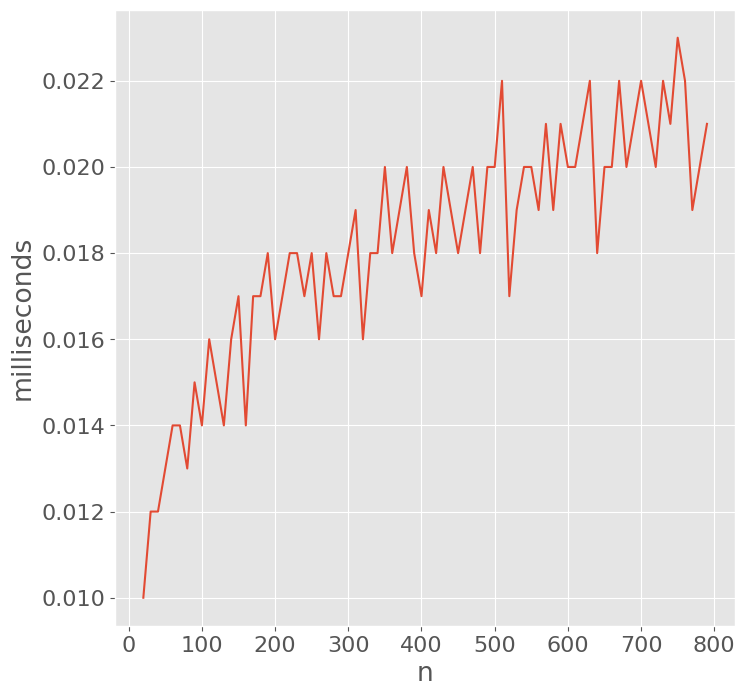

In [52]:
exp_2_fast = lambda n: exp_fast(2.0, n)
plot_times('exp_2_fast', range(20, 800, 10))

### Linear Growth

In [12]:
def exp(b, n):
    if n == 0:
        return 1
    else:
        return b * exp(b, n-1)

In [13]:
def extra_work():
  n = [i for i in range(10)]

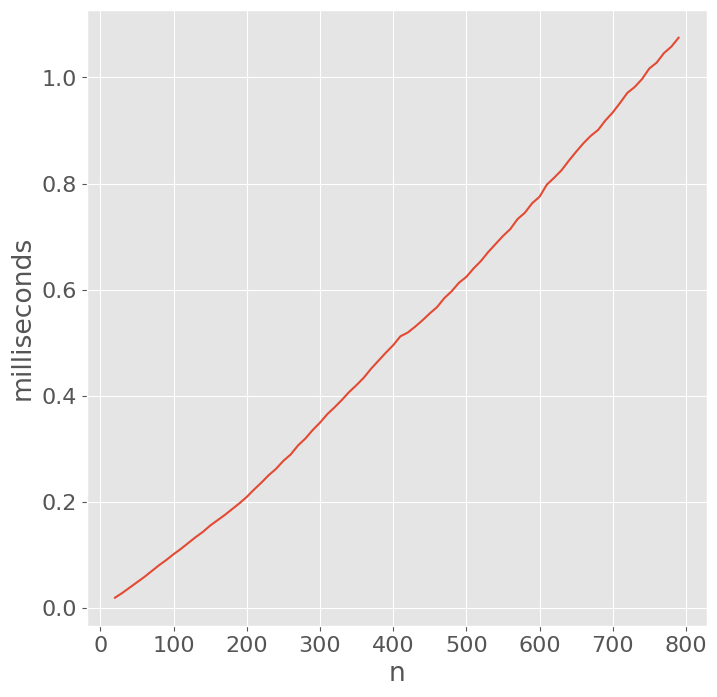

In [14]:
exp_2 = lambda n: exp(2, n)
plot_times('exp_2', range(20, 800, 10))

### Quadratic Growth

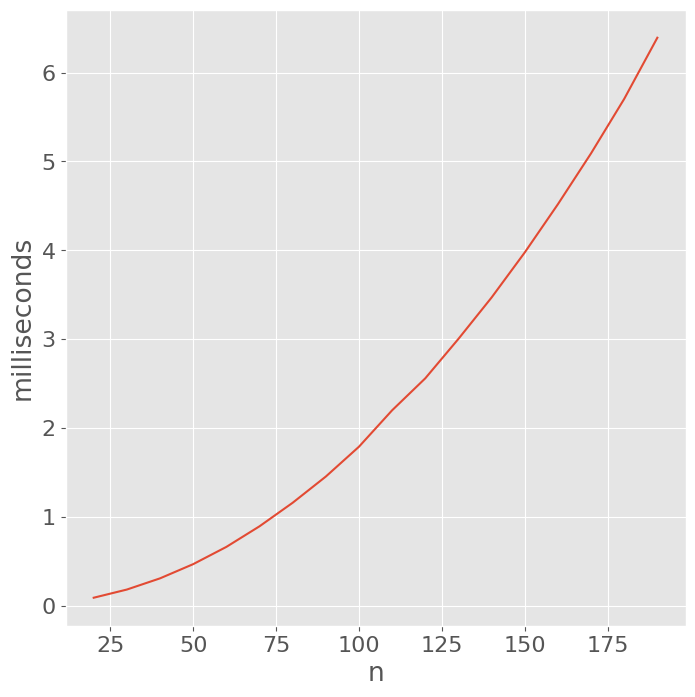

In [15]:
def overlap(a, b):
    count = 0
    for item in a:
        for other in b:
            if item == other:
                count += 1
    return count

overlap_ranges = lambda n: overlap(list(range(n)), list(range(n)))

plot_times('overlap_ranges', range(20, 200, 10))

### Exponential Growth

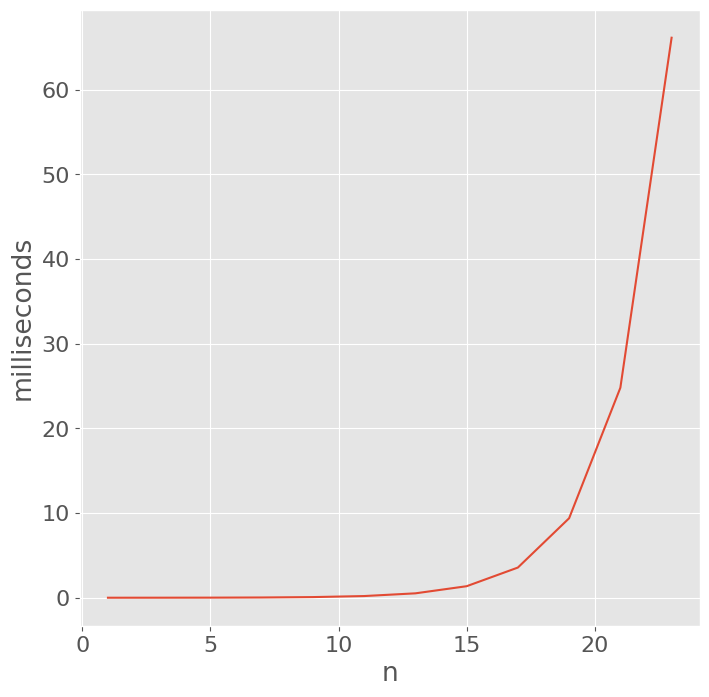

In [16]:
def vir_fib(n):
    if n <= 1:
        return n
    return vir_fib(n - 2) + vir_fib(n - 1)

plot_times('vir_fib', range(1, 25, 2))

## Memoization Revisited

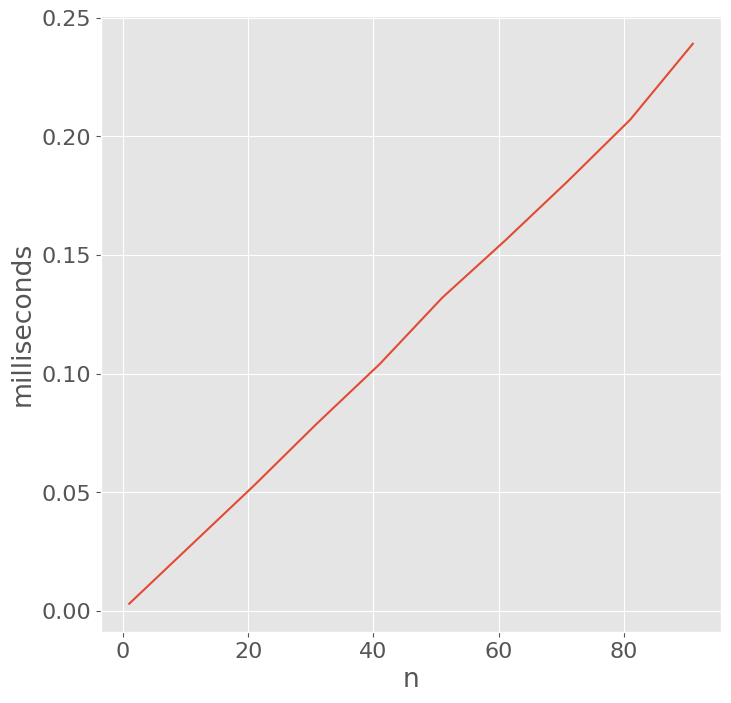

In [17]:
def memoized_vir_fib(n):
    cache = {}
    def memoized(n):
        if n not in cache:
            if n <= 1:
                return n
            cache[n] = memoized(n - 1) + memoized(n - 2)
        return cache[n]
    return memoized(n)

plot_times('memoized_vir_fib', range(1, 100, 10))

## Revisiting Functions

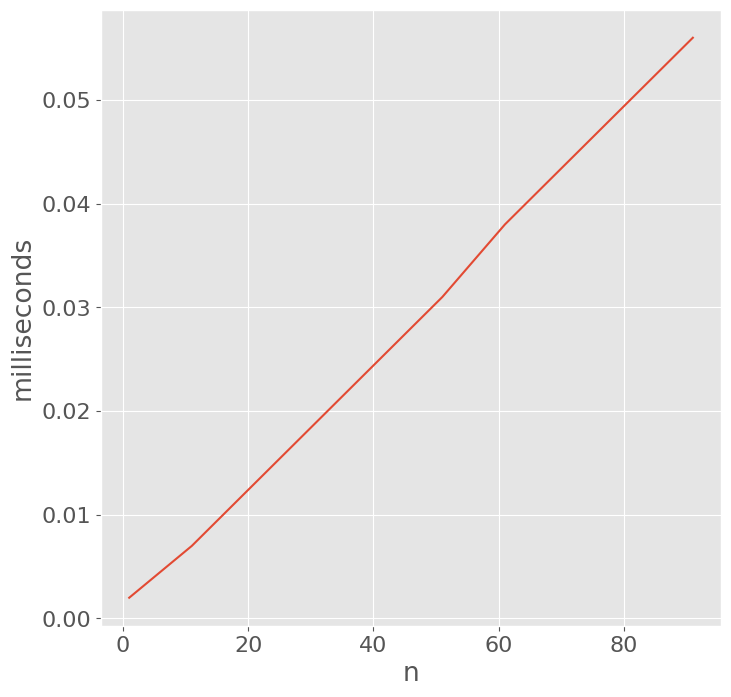

In [18]:
def vir_fib_iter(n):
  prev, curr = 0, 1
  i = 0
  while i < n:
    prev, curr = curr, prev + curr
    i += 1
  return prev
plot_times('vir_fib_iter', range(1, 100, 10))

### Sum Digits

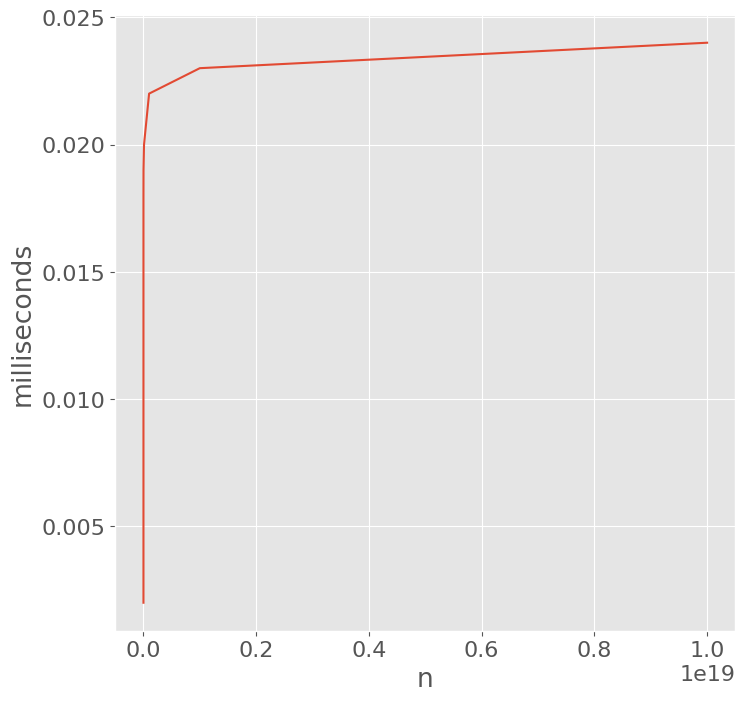

In [19]:
def sum_digits(n):
    if n == 0:
        return 0
    return sum_digits(n // 10) + n % 10

plot_times('sum_digits', [10 ** n_zeros for n_zeros in range(20)])

### Count Partitions

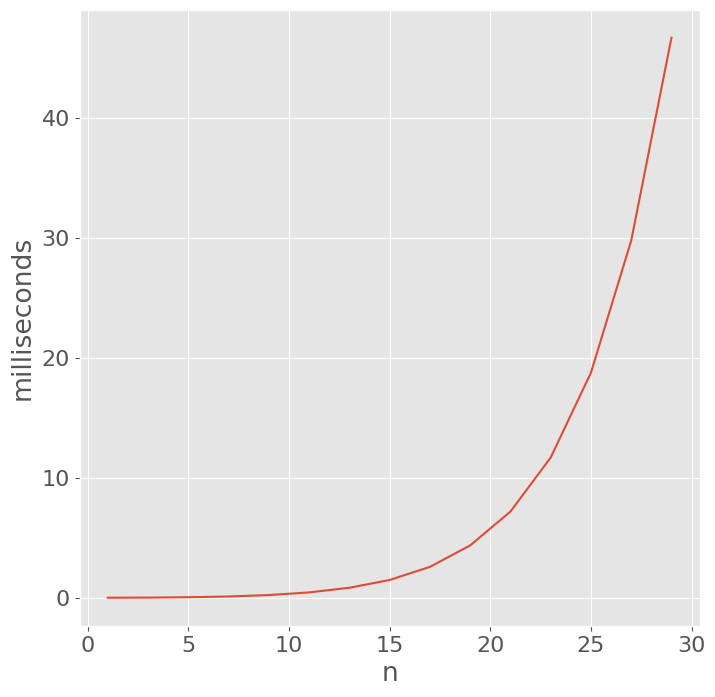

In [20]:
def count_partitions(n, k):
    if n == 0:
        return 1
    elif k == 0 or n < 0:
        return 0
    return count_partitions(n - k, k) + count_partitions(n, k - 1)

wrapper = lambda n: count_partitions(n, n)
plot_times('wrapper', range(1, 30, 2))

### Palindrome

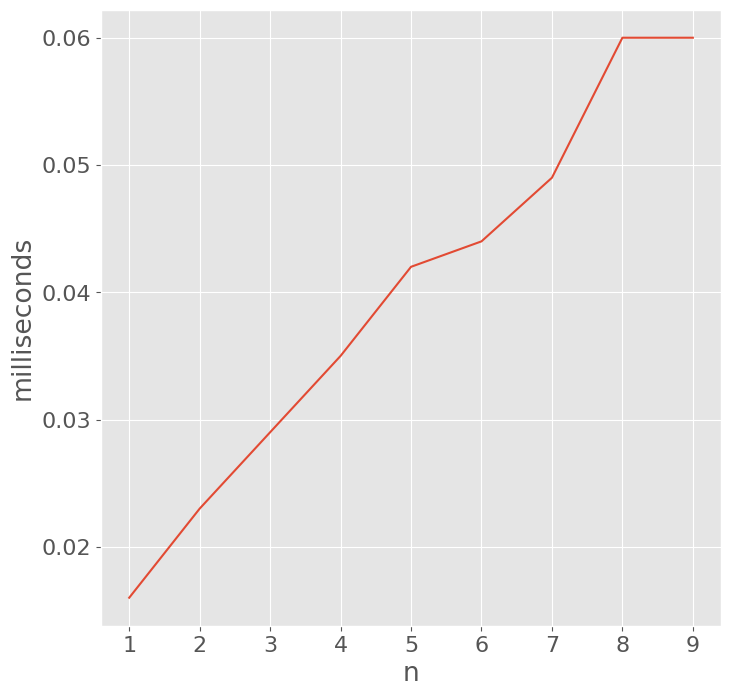

In [21]:
def palindrome(s):
    return all(map(lambda x: x[0] == x[1], zip(s, reversed(s))))

from random import randint
wrapper = lambda n: palindrome(''.join([chr(randint(ord('a'), ord('z'))) for _ in range(n)]))

plot_times('wrapper', range(1, 10, 1))

## Space Usage

In [22]:
# importing the module
import tracemalloc

def list_sequence():
  nums = [i for i in range(10000)]

def gen_nums(n):
  i = 0
  while i < n:
    yield i
    i += 1

def naturals():
  i = 0
  while True:
    yield i
    i += 1

def generator_sequence():
  nums = gen_nums(1000)
  total = 0


In [23]:
list(naturals())

MemoryError: 

In [ ]:
# LIST MEMORY USAGE
tracemalloc.start()
list_sequence()
print("Peak memory usage (KB) with lists:", tracemalloc.get_traced_memory()[1] / 1024)
tracemalloc.stop()

In [ ]:
# GENERATOR MEMORY USAGE
tracemalloc.start()
generator_sequence()
print("Peak memory usage (KB) with generators:", tracemalloc.get_traced_memory()[1] / 1024)
tracemalloc.stop()

In [ ]:
# VIR_FIB MEMORY USAGE
tracemalloc.start()
vir_fib(30)
print("Peak memory usage (KB) of fib:", tracemalloc.get_traced_memory()[1] / 1024)
tracemalloc.stop()

In [ ]:
# MEMOIZED VIR_FIB MEMORY USAGE
tracemalloc.start()
memoized_vir_fib(30)
print("Peak memory usage (KB) with memoization:", tracemalloc.get_traced_memory()[1] / 1024)
tracemalloc.stop()

In [ ]:
# VIR_FIB_ITER MEMORY USAGE
tracemalloc.start()
vir_fib_iter(30)
print("Peak memory usage (KB) with iteration:", tracemalloc.get_traced_memory()[1] / 1024)
tracemalloc.stop()